# Comparing models: Burrito Dataset

In [38]:
# imports!
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Task 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- Do train/validate/test split. 
- Begin with baselines for classification.
- Use scikit-learn for various models.
- Get each model's metrics (accuracy, precision, recall, etc.)
- Compare models

In [2]:
# Create your data path
from pathlib import Path
import os
DATA_PATH = Path.cwd().parent.parent.joinpath('data')
print(DATA_PATH)
print(os.listdir(DATA_PATH))

/home/studio-lab-user/intuit-ga-dat17/projects/12-random-forest/data
['apartments', 'banknote.csv', 'beer.txt', 'burritos_cleaned.csv', 'counties.csv', 'default_features_1059_tracks.txt', 'faithful.csv', 'hitters.csv', 'nutrients.txt', 'salaries_census.csv', 'stumble-upon.tsv', 'stumbleupon-data.md', 'titanic.csv', 'vehicles_test.csv', 'vehicles_train.csv', 'walk.csv', 'waterpumps']


In [3]:
# specify the burritos.csv file
data = Path.joinpath(DATA_PATH, 'burritos_cleaned.csv')

In [6]:
# read in the dataframe
df = pd.read_csv(data)

In [7]:
# take a look
df.head(n=2)

,Burrito,Date,Chips,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,1/18/2016,0,6.49,3.0,NaN,NaN,NaN,3.0,5.0,...,0,0,0,0,0,0,0,0,0,False
1,California,1/24/2016,0,5.45,3.5,NaN,NaN,NaN,2.0,3.5,...,0,0,0,0,0,0,0,0,0,False


## Data Preparation

In [8]:
# what are the columns?
df.columns

Index(['Burrito', 'Date', 'Chips', 'Cost', 'Hunger', 'Length', 'Circum',
       'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling',
       'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'overall', 'Rec',
       'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
       'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans',
       'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Egg', 'Mushroom', 'Bacon',
       'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'],
      dtype='object')

In [14]:
# Check for missing data
df.isnull().sum()

Burrito            0
Date               0
Chips              0
Cost               0
Hunger             0
Length           138
Circum           140
Volume           144
Tortilla           0
Temp               0
Meat               0
Fillings           0
Meat:filling       0
Uniformity         0
Salsa              0
Synergy            0
Wrap               0
overall            0
Rec                0
Unreliable         0
NonSD              0
Beef               0
Pico               0
Guac               0
Cheese             0
Fries              0
Sour cream         0
Pork               0
Chicken            0
Shrimp             0
Fish               0
Rice               0
Beans              0
Lettuce            0
Tomato             0
Bell peper         0
Carrots            0
Cabbage            0
Sauce              0
Salsa.1            0
Cilantro           0
Onion              0
Taquito            0
Pineapple          0
Ham                0
Chile relleno      0
Nopales            0
Lobster      

In [16]:
# impute the missing data using the average of the column
df['Length'] = df['Length'].fillna(df['Length'].mean())
df['Circum'] = df['Circum'].fillna(df['Circum'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [17]:
# Confirm that fixed the problem
df.isnull().any()

Burrito          False
Date             False
Chips            False
Cost             False
Hunger           False
Length           False
Circum           False
Volume           False
Tortilla         False
Temp             False
Meat             False
Fillings         False
Meat:filling     False
Uniformity       False
Salsa            False
Synergy          False
Wrap             False
overall          False
Rec              False
Unreliable       False
NonSD            False
Beef             False
Pico             False
Guac             False
Cheese           False
Fries            False
Sour cream       False
Pork             False
Chicken          False
Shrimp           False
Fish             False
Rice             False
Beans            False
Lettuce          False
Tomato           False
Bell peper       False
Carrots          False
Cabbage          False
Sauce            False
Salsa.1          False
Cilantro         False
Onion            False
Taquito          False
Pineapple  

In [20]:
# check out the categorical variable
# df.info()
df.Burrito.value_counts()

California     169
Other          156
Asada           43
Surf & Turf     28
Carnitas        25
Name: Burrito, dtype: int64

In [21]:
# convert the categorical variable to dummies via one-hot encoding
burrito_converted = pd.get_dummies(df['Burrito'])
burrito_converted.head()

,Asada,California,Carnitas,Other,Surf & Turf
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [23]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,burrito_converted],axis=1)
df

,Burrito,Date,Chips,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,...,Asada,California,Carnitas,Other,Surf & Turf,Asada,California,Carnitas,Other,Surf & Turf
0,California,1/18/2016,0,6.49,3.0,20.038233,22.13573,0.786426,3.0,5.0,...,0,1,0,0,0,0,1,0,0,0
1,California,1/24/2016,0,5.45,3.5,20.038233,22.13573,0.786426,2.0,3.5,...,0,1,0,0,0,0,1,0,0,0
2,Carnitas,1/24/2016,0,4.85,1.5,20.038233,22.13573,0.786426,3.0,2.0,...,0,0,1,0,0,0,0,1,0,0
3,Asada,1/24/2016,0,5.25,2.0,20.038233,22.13573,0.786426,3.0,2.0,...,1,0,0,0,0,1,0,0,0,0
4,California,1/27/2016,1,6.59,4.0,20.038233,22.13573,0.786426,4.0,5.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Other,8/27/2019,0,6.00,1.0,17.000000,20.50000,0.570000,5.0,4.0,...,0,0,0,1,0,0,0,0,1,0
417,Other,8/27/2019,0,6.00,4.0,19.000000,26.00000,1.020000,4.0,5.0,...,0,0,0,1,0,0,0,0,1,0
418,California,8/27/2019,0,7.90,3.0,20.000000,22.00000,0.770000,4.0,4.0,...,0,1,0,0,0,0,1,0,0,0
419,Other,8/27/2019,0,7.90,3.0,22.500000,24.50000,1.070000,5.0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# now drop the original column (you don't need it anymore)
df.drop(['Burrito'],axis=1, inplace = True)

In [29]:
# Drop some columns -- these are related to our target var - to prevent "leakage"
# we also drop the date column because it's not immediately useable
df.drop(columns=['Date'], axis=1,inplace = True)       
df.drop(columns=['overall'], axis=1,inplace = True)
df.drop(columns=['Rec'], axis=1,inplace = True)

In [31]:
# check out the target. convert it to an integer (unnecessary but makes it a little easier to read)
df['Great'].head(n=2)
df['Great']=df['Great'].astype(int)
df['Great'].value_counts()

0    239
1    182
Name: Great, dtype: int64

## Prepare for Modeling

In [35]:
# Establish the target variable: is it a great burrito?
y = df['Great']

In [33]:
# Establish the matrix of features: what predicts that it's great?
X = df.drop('Great', axis=1)

In [36]:
# split your data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
# Create a dictionary to store our modeling results for comparison. Enter some fake data.
results_comparison={'model': ['logistic','knn', 'decision tree', 'random forest', 'boosting'],
                   'accuracy': [5,5,5,5,5],
                   'precision': [5,5,5,5,5],
                   'recall': [5,5,5,5,5]}
results_df = pd.DataFrame(results_comparison, columns=['model', 'accuracy', 'precision', 'recall'])
results_df=results_df.set_index('model')
results_df

,accuracy,precision,recall
model,,,
logistic,5,5,5
knn,5,5,5
decision tree,5,5,5
random forest,5,5,5
boosting,5,5,5


<AxesSubplot:xlabel='model'>

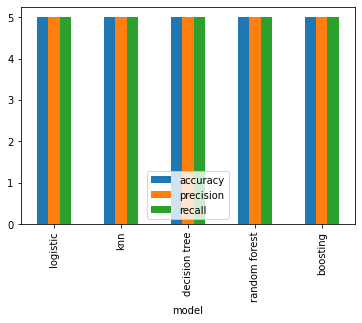

In [45]:
# Plot those results
results_df.plot(kind='bar')

## Model 1. Logistic Regression

In [46]:
# instantiate the model (note we increase max-iter here; default is 100)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
# fit your model on the training dataset
logreg.fit(X_train, y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# predict on the testing dataset
y_preds=logreg.predict(X_test)

In [49]:
# calculate the accuracy of your predictions
print('accuracy',accuracy_score(y_preds, y_test))
print('precision',precision_score(y_preds, y_test))
print('recall',recall_score(y_preds, y_test))

accuracy 0.8113207547169812
precision 0.782608695652174
recall 0.782608695652174


In [51]:
# update our dictionary of results with those scores!
modelname='logistic'
results_df.loc[modelname,'accuracy']=accuracy_score(y_preds, y_test)
results_df.loc[modelname,'precision']=precision_score(y_preds, y_test)
results_df.loc[modelname,'recall']=recall_score(y_preds, y_test)
results_df

,accuracy,precision,recall
model,,,
logistic,0.811321,0.782609,0.782609
knn,5.000000,5.000000,5.000000
decision tree,5.000000,5.000000,5.000000
random forest,5.000000,5.000000,5.000000
boosting,5.000000,5.000000,5.000000


## Model 2. KNN

In [52]:
# instantiate with K=10
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [53]:
# fit with data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [54]:
# predict on the testing dataset
y_preds=knn.predict(X_test)

In [55]:
# calculate the accuracy of your predictions
print('accuracy',accuracy_score(y_preds, y_test))
print('precision',precision_score(y_preds, y_test))
print('recall',recall_score(y_preds, y_test))

accuracy 0.8207547169811321
precision 0.782608695652174
recall 0.8


In [56]:
# update our dictionary of results with those scores!
modelname='knn'
results_df.loc[modelname,'accuracy']=accuracy_score(y_preds, y_test)
results_df.loc[modelname,'precision']=precision_score(y_preds, y_test)
results_df.loc[modelname,'recall']=recall_score(y_preds, y_test)
results_df

,accuracy,precision,recall
model,,,
logistic,0.811321,0.782609,0.782609
knn,0.820755,0.782609,0.800000
decision tree,5.000000,5.000000,5.000000
random forest,5.000000,5.000000,5.000000
boosting,5.000000,5.000000,5.000000


## Decision Tree

In [57]:
# instantiate the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [58]:
# fit with data
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
# predict on the testing dataset
y_preds=tree.predict(X_test)

In [60]:
# calculate the accuracy of your predictions
print('accuracy',accuracy_score(y_preds, y_test))
print('precision',precision_score(y_preds, y_test))
print('recall',recall_score(y_preds, y_test))

accuracy 1.0
precision 1.0
recall 1.0


In [61]:
# update our dictionary of results with those scores!
modelname='decision tree'
results_df.loc[modelname,'accuracy']=accuracy_score(y_preds, y_test)
results_df.loc[modelname,'precision']=precision_score(y_preds, y_test)
results_df.loc[modelname,'recall']=recall_score(y_preds, y_test)
results_df

,accuracy,precision,recall
model,,,
logistic,0.811321,0.782609,0.782609
knn,0.820755,0.782609,0.800000
decision tree,1.000000,1.000000,1.000000
random forest,5.000000,5.000000,5.000000
boosting,5.000000,5.000000,5.000000


## Random Forest

In [62]:
# instantiate the model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rand_forest = RandomForestClassifier(n_estimators = 100)

In [63]:
# fit with data
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# predict on the testing dataset
y_preds=rand_forest.predict(X_test)

In [65]:
# calculate the accuracy of your predictions
print('accuracy',accuracy_score(y_preds, y_test))
print('precision',precision_score(y_preds, y_test))
print('recall',recall_score(y_preds, y_test))

accuracy 1.0
precision 1.0
recall 1.0


In [66]:
# update our dictionary of results with those scores!
# update our dictionary of results with those scores!
modelname='random forest'
results_df.loc[modelname,'accuracy']=accuracy_score(y_preds, y_test)
results_df.loc[modelname,'precision']=precision_score(y_preds, y_test)
results_df.loc[modelname,'recall']=recall_score(y_preds, y_test)
results_df

,accuracy,precision,recall
model,,,
logistic,0.811321,0.782609,0.782609
knn,0.820755,0.782609,0.800000
decision tree,1.000000,1.000000,1.000000
random forest,1.000000,1.000000,1.000000
boosting,5.000000,5.000000,5.000000


## Boosting

In [67]:
# instantiate the model
boosting = AdaBoostClassifier(n_estimators=100)

In [68]:
# fit with data
boosting.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [69]:
# predict on the testing dataset
y_preds=boosting.predict(X_test)

In [70]:
# calculate the accuracy of your predictions
print('accuracy',accuracy_score(y_preds, y_test))
print('precision',precision_score(y_preds, y_test))
print('recall',recall_score(y_preds, y_test))

accuracy 1.0
precision 1.0
recall 1.0


In [71]:
# update our dictionary of results with those scores!
modelname='boosting'
results_df.loc[modelname,'accuracy']=accuracy_score(y_preds, y_test)
results_df.loc[modelname,'precision']=precision_score(y_preds, y_test)
results_df.loc[modelname,'recall']=recall_score(y_preds, y_test)
results_df

,accuracy,precision,recall
model,,,
logistic,0.811321,0.782609,0.782609
knn,0.820755,0.782609,0.800000
decision tree,1.000000,1.000000,1.000000
random forest,1.000000,1.000000,1.000000
boosting,1.000000,1.000000,1.000000


## Compare your results

<AxesSubplot:xlabel='model'>

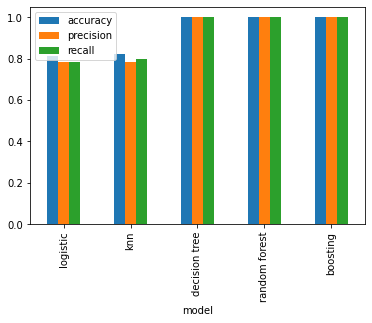

In [72]:
# Plot those results
results_df.plot(kind='bar')

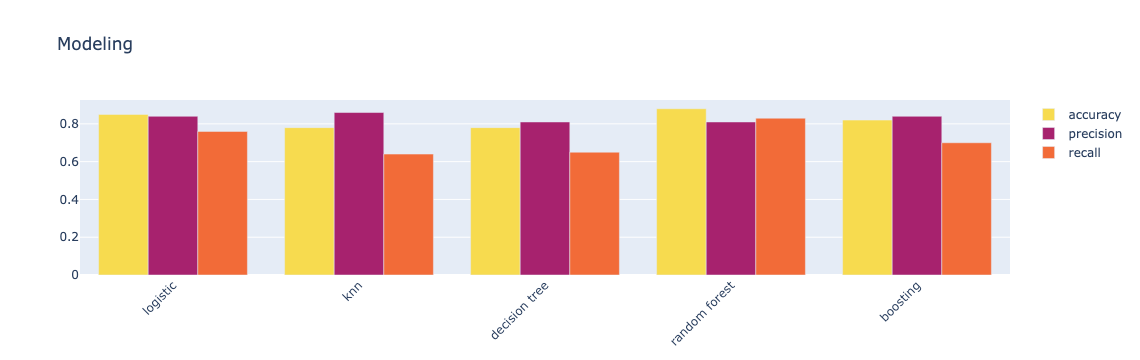

In [51]:
# quick reminder: how to build this with plotly so it looks nice.
# https://digitalsynopsis.com/design/minimal-web-color-palettes-combination-hex-code/